<a href="https://colab.research.google.com/github/AdrianGomoescu/Stock-price-prediction-using-ML/blob/main/Aplicatie_AdrianGomoescu_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#This app uses an artificial recurrent neural network - Long Short Term Memory (LSTM) 
#to predict the closing price of a stock

In [52]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [53]:
#Declare variables
stock = "AAPL"
start_date = "2012-01-01"
end_date = "2022-08-30"

In [54]:
#Get the stock info
df = web.DataReader(stock, data_source='yahoo',start=start_date, end=end_date)

In [56]:
#Show the stock info
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540048
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880665
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234
...,...,...,...,...,...,...
2022-08-24,168.110001,166.250000,167.320007,167.529999,53841500.0,167.529999
2022-08-25,170.139999,168.350006,168.779999,170.029999,51218200.0,170.029999
2022-08-26,171.050003,163.559998,170.570007,163.619995,78961000.0,163.619995


In [57]:
#Get the number of rows and columns in the dataset
df.shape

(2683, 6)

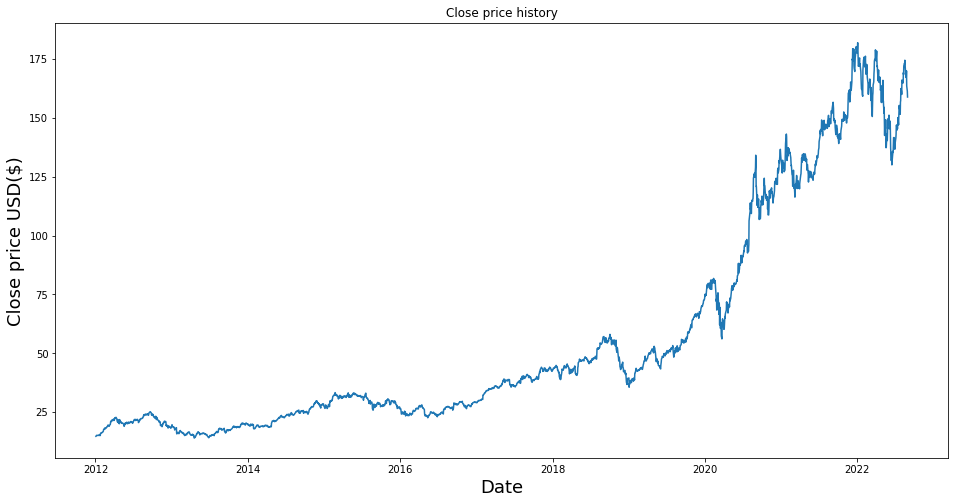

In [58]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.show()

In [59]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2147

In [60]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.89057642],
       [0.87724811],
       [0.86255118]])

In [61]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [62]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [63]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2087, 60, 1)

In [64]:
#Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [65]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

2087/2087 [==============================] - 68s 31ms/step - loss: 3.3011e-04


In [67]:
#Create the testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [68]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [69]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [70]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [71]:
#Evaluate the model by calculating the root mean square error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse                            #RMSE = 0 means that the prediction was perfect

4.9316708766999975

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


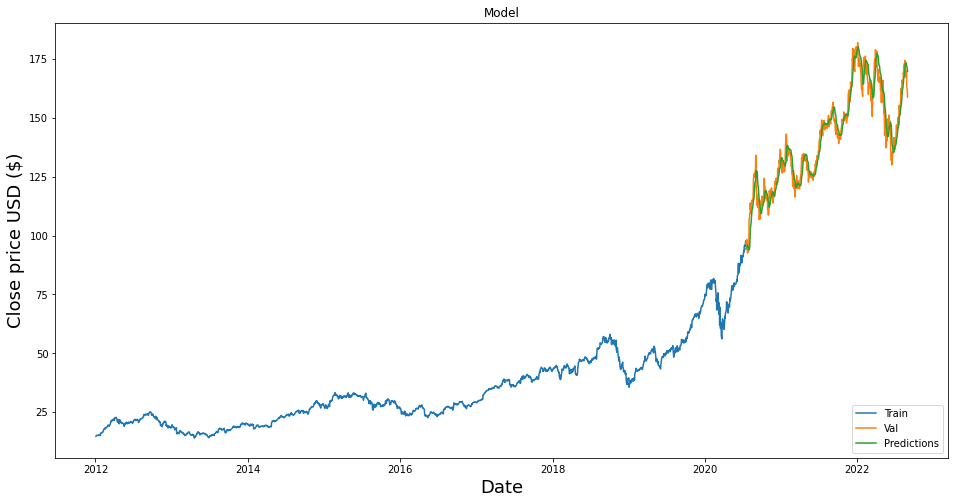

In [72]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [73]:
#Show the actual price and the predicted price
valid

,Close,Predictions
Date,,
2020-07-16,96.522499,94.219307
2020-07-17,96.327499,94.726471
2020-07-20,98.357498,95.079132
2020-07-21,97.000000,95.507622
2020-07-22,97.272499,95.802933
...,...,...
2022-08-24,167.529999,172.996414
2022-08-25,170.029999,172.383804
2022-08-26,163.619995,171.985718


In [74]:
#Predict the price for a specific date using the trained model
stock_quote = web.DataReader(stock, data_source='yahoo', start=start_date, end = end_date)
#Create a new dataframe
new_df = stock_quote.filter(['Close'])
#Get the last 60 day closing price values & convert to array
last_60_days = new_df[-60:].values
#Scale the data to values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an emply list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
#Print the predicted price
print(pred_price)

[[168.18178]]


In [75]:
#Print the actual price for the specified date
stock_quote2 = web.DataReader(stock, data_source='yahoo', start='2022-08-31', end = '2022-08-31')
print(stock_quote2['Close'])

Date
2022-08-31    157.220001
Name: Close, dtype: float64
